In [2]:
# importing libraries
import pandas as pd
import numpy as np                     
import seaborn as sns                  
import matplotlib.pyplot as plt 
import seaborn as sn                   
%matplotlib inline
import warnings                        
warnings.filterwarnings("ignore")

In [3]:
# loading the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape, test.shape

((31647, 18), (13564, 17))

In [5]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [6]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [7]:
train['subscribed'].value_counts()

subscribed
no     27932
yes     3715
Name: count, dtype: int64

In [8]:
#normalization:propotion values(percentage)
train['subscribed'].value_counts(normalize=True)

subscribed
no     0.882611
yes    0.117389
Name: proportion, dtype: float64

<Axes: xlabel='subscribed'>

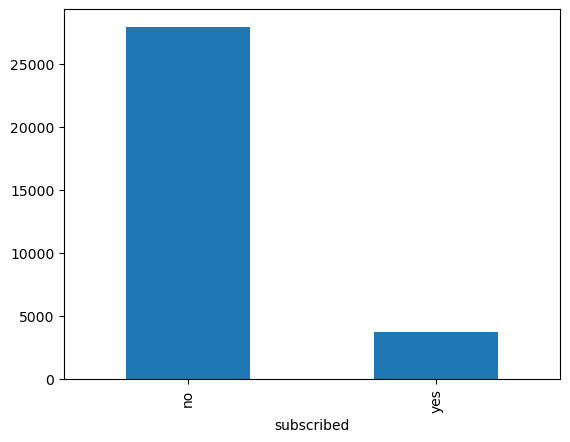

In [9]:
# plotting the bar plot of frequencies
train['subscribed'].value_counts().plot.bar()

<Axes: xlabel='age', ylabel='Density'>

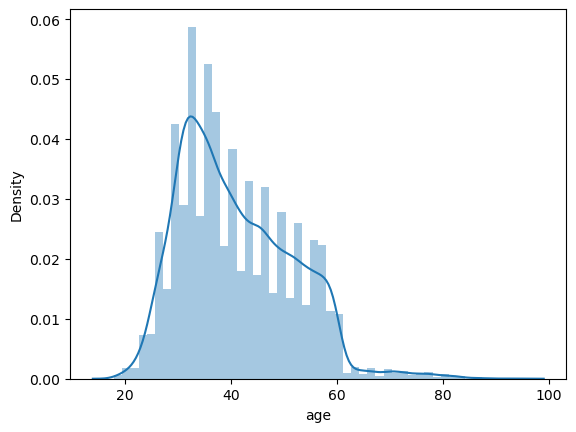

In [10]:
sns.distplot(train['age'])

<Axes: xlabel='job'>

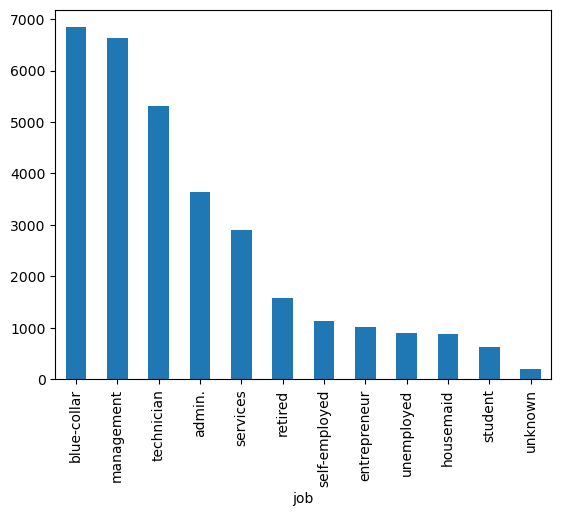

In [11]:
train['job'].value_counts().plot.bar()

<Axes: xlabel='default'>

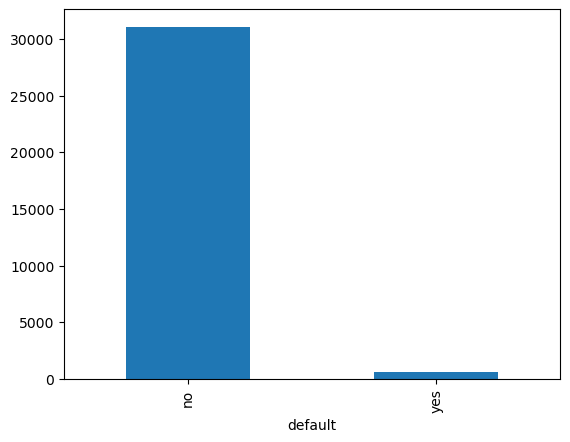

In [12]:
train['default'].value_counts().plot.bar()

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

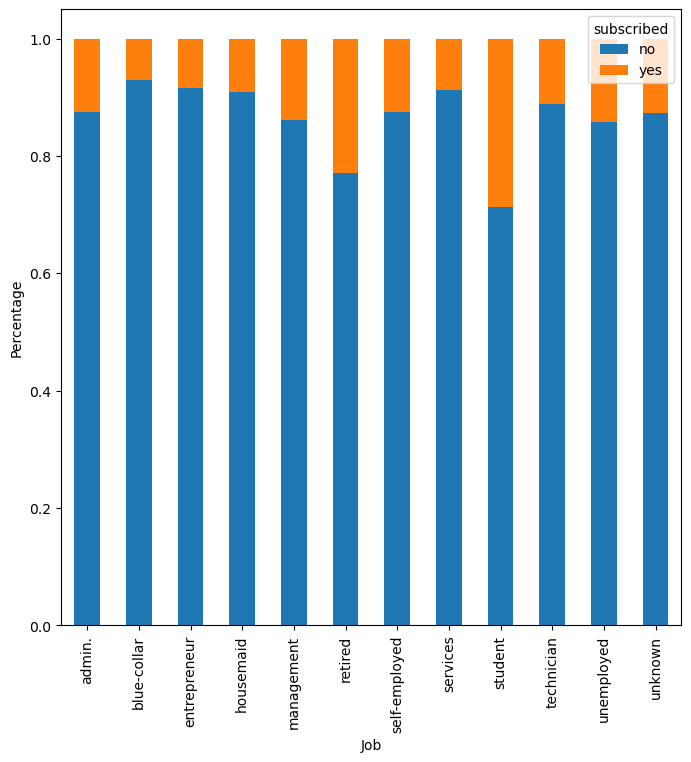

In [14]:
print(pd.crosstab(train['job'],train['subscribed']))

job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

subscribed      0     1
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

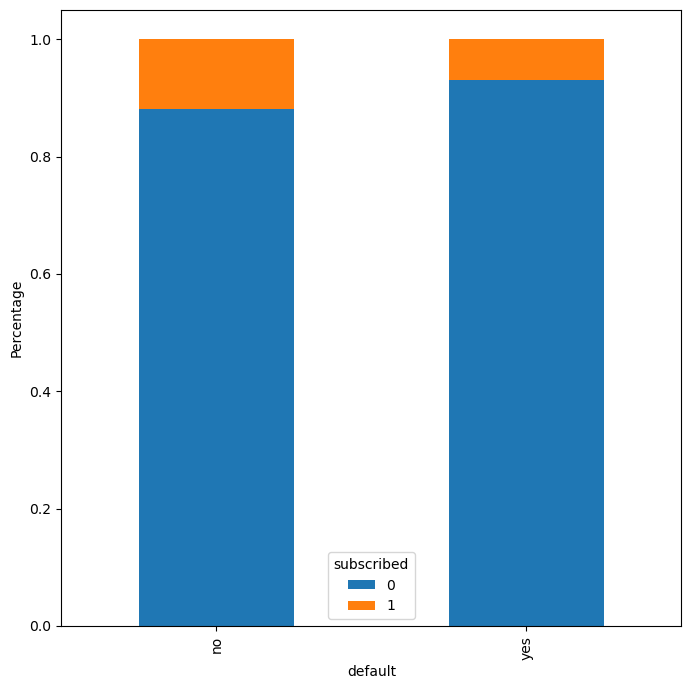

In [20]:
print(pd.crosstab(train['default'],train['subscribed']))

default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

In [21]:
train['subscribed'].replace('no',0,inplace=True)
train['subscribed'].replace('yes',1,inplace=True)

<Axes: >

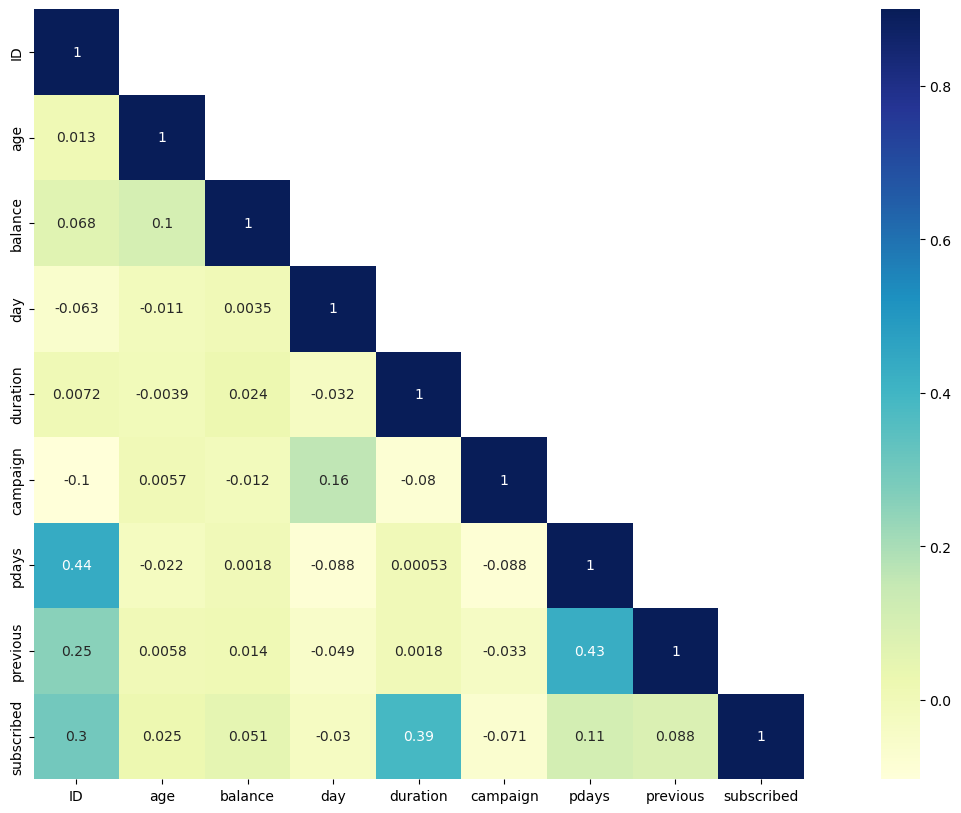

In [31]:
numeric_columns = train.select_dtypes(include=[np.number]).columns
corr = train[numeric_columns].corr()
#corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [32]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [38]:
target = train['subscribed']

In [41]:
train = train.drop('subscribed', axis=1)

In [42]:
train=pd.get_dummies(train)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# splitting into train and validation with 20% data in validation set and 80% data in train set.
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
# defining the logistic regression model
lreg = LogisticRegression()

In [47]:
# fitting the model on  X_train and y_train
lreg.fit(X_train,y_train)

LogisticRegression()

In [48]:
# making prediction on the validation set
prediction = lreg.predict(X_val)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
# calculating the accuracy score
accuracy_score(y_val, prediction)

0.889257503949447

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
# defining the decision tree model with depth of 4, you can tune it further to improve the accuracy score
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [53]:
# fitting the decision tree model
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [54]:
# making prediction on the validation set
predict = clf.predict(X_val)

In [55]:
# calculating the accuracy score
accuracy_score(y_val, predict)

0.9042654028436019

In [56]:
test = pd.get_dummies(test)

In [57]:
test_prediction = clf.predict(test)

In [58]:
submission = pd.DataFrame()

In [59]:
# creating a Business_Sourced column and saving the predictions in it
submission['ID'] = test['ID']
submission['subscribed'] = test_prediction

In [60]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [61]:
submission.to_csv('submission.csv', header=True, index=False)